Connect to Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/TA/dataset/Jakut.csv',parse_dates=True)
data  = data.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[1:100]
data = data['Temperature']
data = data.replace('',math.nan)
data = data.replace(8888.0,math.nan)
data = data.replace(0.0,math.nan)
data = data.fillna(data.mean())
data = pd.DataFrame(data)

In [ ]:
data

,Temperature
1,26.4
2,26.4
3,25.6
4,27.7
5,28.5
...,...
95,29.3
96,28.8
97,27.6
98,27.8


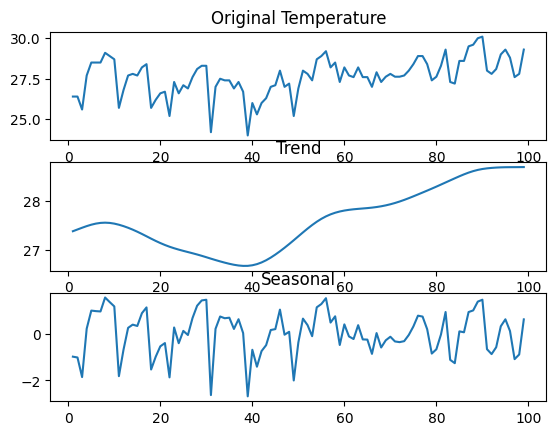

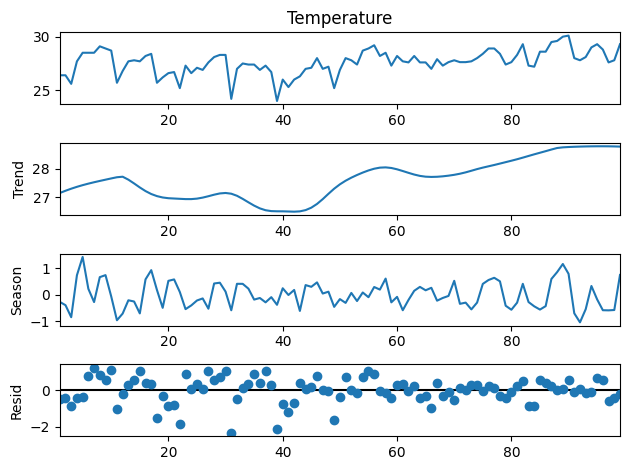

In [ ]:
#split data 
train_size = int(len(data) * 0.80)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

#decompose data into 
from statsmodels.tsa.seasonal import STL
series = data['Temperature']

cycle, trend = sm.tsa.filters.hpfilter(series, lamb=1600)
fig , ax = plt.subplots(3,1)
ax[0].plot (series)
ax[0].set_title('Original Temperature')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Seasonal')
plt.show()

#show residual from stl
stl = STL(series, period = 12).fit()
result = stl.plot()
plt.show()

RMSE: 0.824
MAPE: 0.021
MAE: 0.588
R2: -0.019


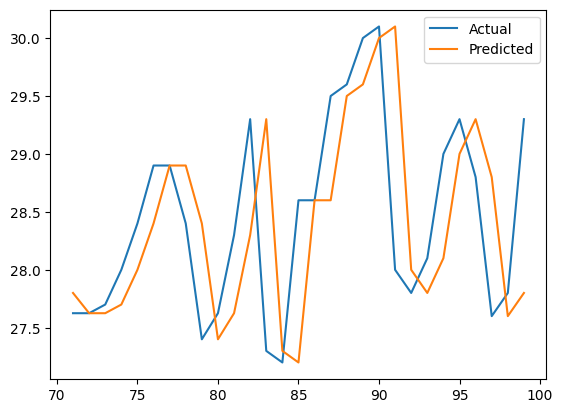

In [ ]:

#create Prediction model
prediction = series.shift(1).dropna()

#calculate Error
rmse = np.sqrt(mean_squared_error(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):]))
mape = mean_absolute_percentage_error(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):])
mae = mean_absolute_error(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):])
r2 = r2_score(series[int(len(series) * 0.7)+1:], prediction.iloc[int(len(series) * 0.7):])

print('RMSE: %.3f' % rmse)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

#plot prediction
plt.plot(series[int(len(series) * 0.7)+1:])
plt.plot(prediction.iloc[int(len(series) * 0.7):])
plt.legend(['Actual','Predicted'])
plt.show()